In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from tqdm import tqdm
import torch
import numpy as np
from argparse import Namespace

from env.KREnvironment_WholeSession_GPU import KREnvironment_WholeSession_GPU

output_path = 'output/Kuairand_1K/env/log/'
uirm_log_path = output_path + 'user_KRMBUserResponse_lr0.0001_reg0.01_nlayer6.model.log'

slate_size = 6
max_step = 10
ep_batch_size = 16
initial_temper = max_step
rho = 0.1
args = eval(f"Namespace(uirm_log_path='{uirm_log_path}', slate_size={slate_size}, \
            max_step_per_episode={max_step}, episode_batch_size={ep_batch_size}, \
            initial_temper={initial_temper}, item_correlation={rho}, device='cpu')")

env = KREnvironment_WholeSession_GPU(args)

/opt/conda/envs/pt_rlsim/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Environment arguments: 
Namespace(attn_n_head=4, batch_size=128, cuda=0, data_separator=',', dropout_rate=0.1, enc_dim=64, epoch=10, item_latent_dim=32, item_meta_file='dataset/Kuairand-1K/video_features_basic_1K_fillna.csv', l2_coef=0.01, loss='bce', lr=0.0001, max_hist_seq_len=100, meta_file_sep=',', model_path='output/Kuairand_1K/env/user_KRMBUserResponse_lr0.0001_reg0.01_nlayer6.model', n_worker=4, save_with_val=False, scorer_hidden_dims=[128, 32], seed=619607, state_hidden_dims=[128], test_batch_size=128, test_file='', test_holdout_per_user=5, train_file='dataset/Kuairand-1K/log_session_4_08_to_5_08_1K.csv', transformer_d_forward=64, transformer_n_layer=6, user_latent_dim=32, user_meta_file='dataset/Kuairand-1K/user_features_1K_fillna.csv', val_batch_size=128, val_file='', val_holdout_per_user=5)
Loading raw data
Load user sequence reader
initiate KuaiRandMultiBehaior sequence reader
Loading data files
Load item meta data
Load user meta data
build vocab for onehot features


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 2312.87it/s]


build vocab for onehot features


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.79it/s]


build vocab for multihot features:
	tag


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4371868/4371868 [00:06<00:00, 672425.58it/s]


sequence holdout for users (-1, 0, 0)
{'raw_data_size': 1713050, 'data_size': [1713050, 0, 0], 'n_user': 997, 'n_item': 31698, 'max_seq_len': 100, 'user_features': ['user_active_degree', 'is_live_streamer', 'is_video_author', 'follow_user_num_range', 'fans_user_num_range', 'friend_user_num_range', 'register_days_range', 'onehot_feat0', 'onehot_feat1', 'onehot_feat6', 'onehot_feat9', 'onehot_feat10', 'onehot_feat11'], 'user_feature_dims': {'user_active_degree': 7, 'is_live_streamer': 2, 'is_video_author': 2, 'follow_user_num_range': 8, 'fans_user_num_range': 8, 'friend_user_num_range': 7, 'register_days_range': 7, 'onehot_feat0': 2, 'onehot_feat1': 7, 'onehot_feat6': 3, 'onehot_feat9': 7, 'onehot_feat10': 5, 'onehot_feat11': 3}, 'item_features': ['video_type', 'music_type', 'upload_type', 'tag'], 'item_feature_dims': {'video_type': 3, 'music_type': 7, 'upload_type': 32, 'tag': 59}, 'feedback_type': ['is_click', 'long_view', 'is_like', 'is_comment', 'is_forward', 'is_follow', 'is_hate'],

### User Profile and User History in the Observation Dict

In [3]:
from utils import show_batch, wrap_batch

observation = env.reset({'batch_size': ep_batch_size})
show_batch(env.current_observation['user_profile'])

user_id: size torch.Size([16]), 
	first 5 tensor([507, 986, 914, 121, 291])
uf_user_active_degree: size torch.Size([16, 7]), 
	first 5 tensor([[1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.]])
uf_is_live_streamer: size torch.Size([16, 2]), 
	first 5 tensor([[1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.]])
uf_is_video_author: size torch.Size([16, 2]), 
	first 5 tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.]])
uf_follow_user_num_range: size torch.Size([16, 8]), 
	first 5 tensor([[0., 0., 0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.]])
uf_fans_user_num_range: size torch.Size([16, 8]), 
	first 5 tensor([[0., 1., 0., 0., 0., 0., 0., 0.],
    

In [4]:
from utils import show_batch, wrap_batch
show_batch(env.current_observation['user_history'])

history: size torch.Size([16, 100]), 
	first 5 tensor([[20103, 23767, 10548, 28179, 11126, 11971, 11492, 20106,   974,  3762,
         11178, 28106, 24729,  9919, 23221, 29262, 29804, 17988,  8483, 14705,
          3294, 25607,  8488, 20665, 10474, 11245,  3875, 11131, 26108, 21125,
          3169,  7215,   446,  6846,  9888,  4848, 10465, 11380,   446, 14277,
          6855, 10721, 12383,  3283, 18579, 19413, 11109,  9504,  6830, 11535,
         24555, 20123,  9796, 15567, 10655, 31096, 20270, 23018,  8459, 10308,
          3590,  5726,  6806, 10456, 21216,  6525,  3820, 10417, 21585, 10469,
         10575, 10425,  3373, 10438, 11115, 10286, 28151,  1165, 24174, 27208,
         22860,  5839, 24500, 10490,  2657, 10574, 24526, 10589,  6936,  4060,
          2564,  6837, 26424,  5842, 24200,  6079, 20184, 17894, 10462,  7606],
        [28213, 12599, 10736, 29253, 22528, 10676,  5000, 25194, 28197, 28173,
         12753, 26224, 10700,  3821, 18598,  1123, 15715, 31381, 21847,  7593,
    

### Random Interaction

In [13]:
from tqdm import tqdm
import torch

N = len(env.candidate_iids) # number of candidates

feedback_history = {f: [] for f in env.response_types}

for i in tqdm(range(20)):
#     action = torch.randn(BS,env.action_dim)
    action = torch.randint(0,N,(BS, env.action_dim))
    new_observation, user_feedback, updated_observation = env.step({'action': action})
    # (B, slate_size, n_feedback)
    response = user_feedback['immediate_response']
    for i,f in enumerate(env.response_types):
        feedback_history[f].append(torch.mean(response[:,:,i], dim=1).numpy())
    observation = new_observation
env.stop()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:59<00:00,  5.97s/it]


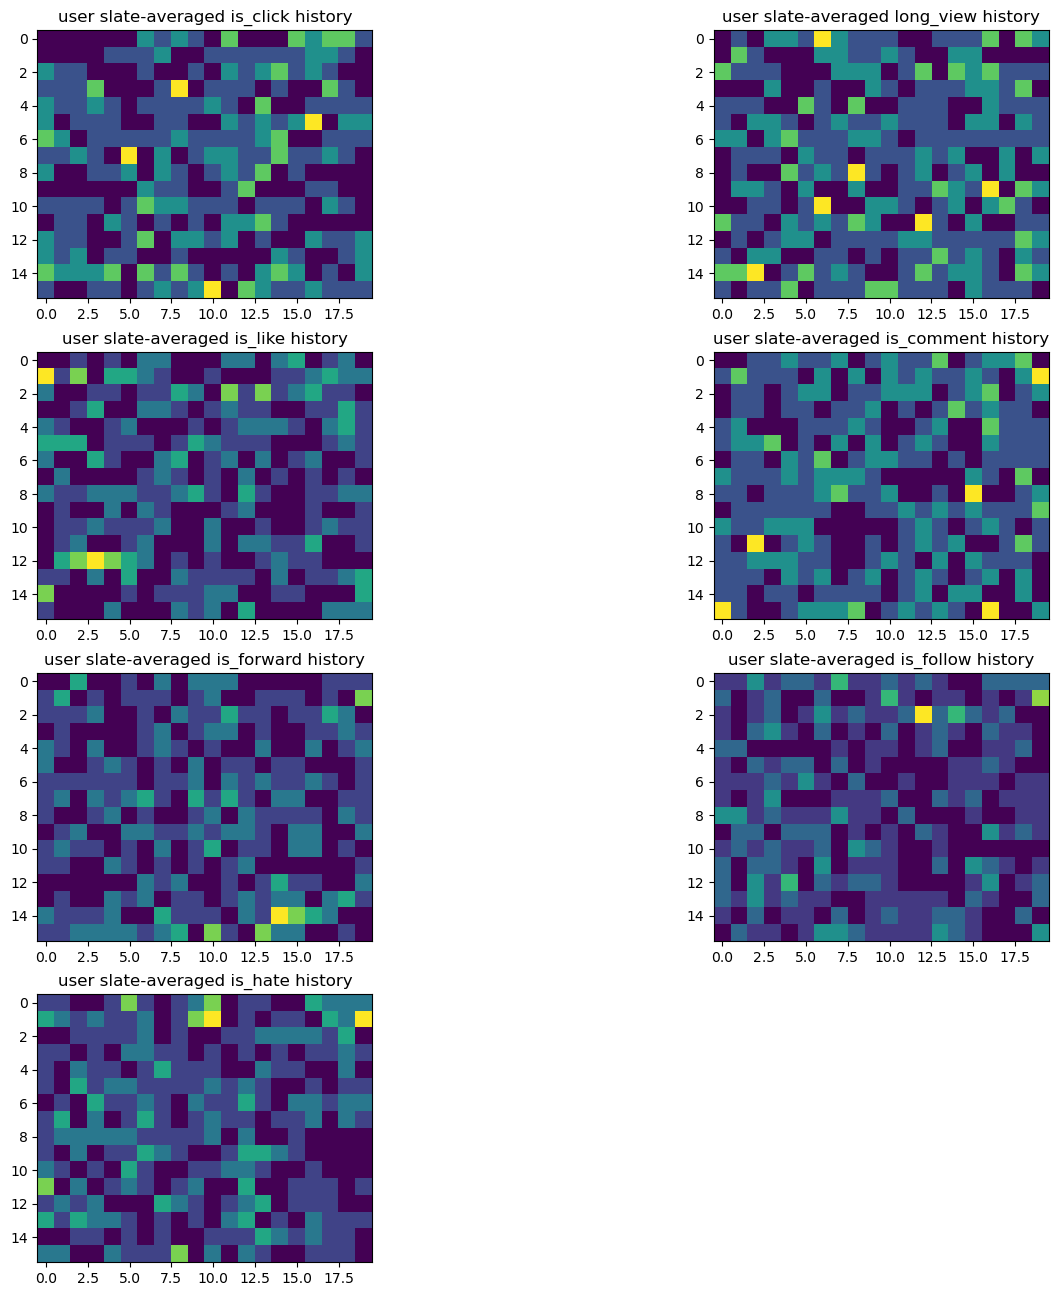

In [26]:
import numpy as np
import matplotlib.pyplot as plt
# selected_feedbacks = ['is_click', 'long_view', 'is_forward']
selected_feedbacks = env.response_types
n_row = (len(selected_feedbacks)+1)//2
plt.figure(figsize = (16,4*n_row))
for i,f in enumerate(selected_feedbacks):
    H = np.transpose(np.array(feedback_history[f]))
    plt.subplot(n_row,2,i+1)
    plt.imshow(H)
    plt.title(f'user slate-averaged {f} history')
plt.show()

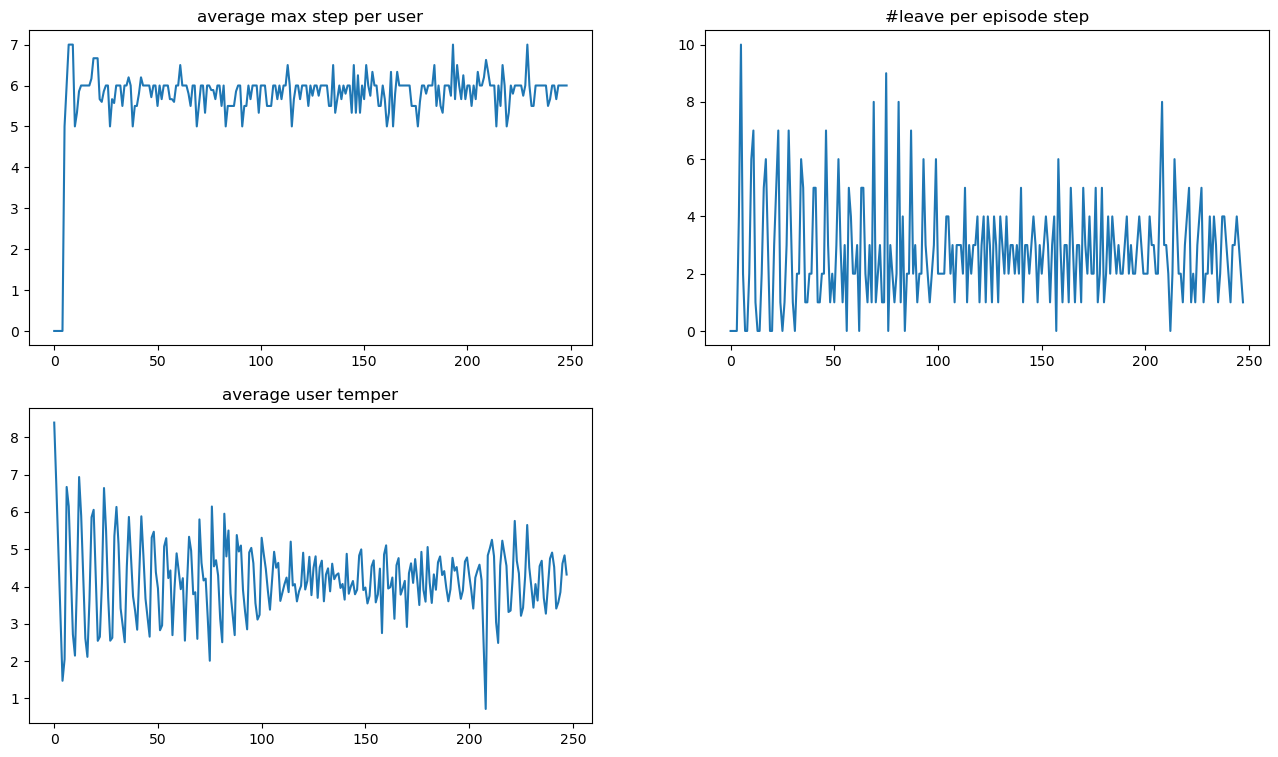

In [20]:
plt.figure(figsize = (16,9))
plt.subplot(2,2,1)
plt.plot(env.env_history['step'])
plt.title('average max step per user')
plt.subplot(2,2,2)
plt.plot(env.env_history['leave'])
plt.title('#leave per episode step')
plt.subplot(2,2,3)
plt.plot(env.env_history['temper'])
plt.title('average user temper')
plt.show()

### Env.step()

In [27]:
N = len(env.candidate_iids)
# actions (exposures), (B, slate_size), indices of self.candidate_iid
action = torch.randint(0,N,(BS, env.action_dim))
coverage = len(torch.unique(action))
B = env.episode_batch_size

########################################
# This is where the action take effect #
# (B, action_dim, 1, enc_dim)
batch = {'item_id': env.candidate_iids[action]}
batch.update(env.current_observation['user_profile'])
batch.update(env.current_observation['user_history'])
batch.update({k:v[action] for k,v in env.candidate_item_meta.items()})
out_dict = env.immediate_response_model(batch)
########################################

# (B, slate_size, n_feedback)
behavior_scores = out_dict['probs']

# item correlation
item_enc = env.candidate_item_encoding[action].view(B, env.slate_size, -1)
# (B, slate_size)
corr_factor = env.get_intra_slate_similarity(item_enc)

# user response sampling
# (B, slate_size, n_feedback)
point_scores = torch.sigmoid(behavior_scores) - corr_factor.view(B, env.slate_size, 1) * env.rho
point_scores[point_scores < 0] = 0

# (B, slate_size, n_feedback)
response = torch.bernoulli(point_scores).detach()

torch.Size([16, 6, 7])


In [30]:
print("Interaction probability")
print(point_scores)

Interaction probability
tensor([[[0.1742, 0.1743, 0.1727, 0.1732, 0.1733, 0.1733, 0.1894],
         [0.1850, 0.1850, 0.1851, 0.1851, 0.1856, 0.1855, 0.1887],
         [0.1583, 0.1581, 0.1571, 0.1575, 0.1577, 0.1580, 0.1792],
         [0.2383, 0.2380, 0.2253, 0.2278, 0.2263, 0.2279, 0.2746],
         [0.1578, 0.1578, 0.1578, 0.1579, 0.1584, 0.1582, 0.1647],
         [0.1594, 0.1594, 0.1592, 0.1593, 0.1595, 0.1596, 0.1688]],

        [[0.1031, 0.1031, 0.3335, 0.2554, 0.1050, 0.3021, 0.1778],
         [0.1066, 0.1066, 0.3370, 0.2449, 0.1084, 0.3097, 0.1793],
         [0.1242, 0.1243, 0.3544, 0.3266, 0.1306, 0.3189, 0.2404],
         [0.1045, 0.1045, 0.3349, 0.2813, 0.1083, 0.2942, 0.1939],
         [0.1110, 0.1111, 0.3414, 0.2743, 0.1133, 0.3005, 0.1997],
         [0.1087, 0.1087, 0.3390, 0.2619, 0.1110, 0.2952, 0.1700]],

        [[0.1482, 0.1481, 0.1480, 0.1640, 0.1486, 0.1486, 0.2041],
         [0.3289, 0.3291, 0.3339, 0.3342, 0.3364, 0.3419, 0.3942],
         [0.1421, 0.1420, 0.1420, 

In [31]:
print("Intra slate similarity:")
print(corr_factor)

Intra slate similarity:
tensor([[3.2759, 3.1511, 3.4313, 2.7607, 3.4232, 3.4099],
        [3.9700, 3.9350, 3.7608, 3.9567, 3.8909, 3.9142],
        [3.5223, 1.7172, 3.5816, 3.3417, 3.6260, 3.5652],
        [3.5805, 3.1393, 3.4066, 2.6492, 3.5981, 3.4942],
        [3.3099, 2.5452, 3.4368, 3.5389, 3.3573, 3.4509],
        [3.8591, 3.6529, 3.7010, 3.7167, 3.8892, 3.7284],
        [3.8075, 3.8365, 3.8389, 3.5548, 2.9129, 3.8589],
        [3.9411, 3.9601, 3.9403, 3.6154, 3.8405, 3.3704],
        [1.8992, 3.3374, 3.2361, 3.3316, 3.4479, 3.0869],
        [3.1760, 3.6191, 3.6465, 3.5070, 3.5264, 2.6217],
        [3.3507, 3.3200, 3.4880, 2.1885, 3.5680, 3.2435],
        [3.9309, 3.9334, 3.8902, 3.9055, 3.7638, 3.8800],
        [3.4728, 3.6481, 3.8228, 3.5272, 3.6613, 3.6574],
        [3.7018, 3.7622, 3.6931, 3.1254, 3.6454, 3.5531],
        [3.8228, 3.8571, 3.7872, 3.8797, 3.6654, 3.8535],
        [3.3119, 3.3129, 3.1506, 3.2436, 2.2968, 2.3698]],
       grad_fn=<MeanBackward1>)
